In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import empyrical
%matplotlib inline

In [47]:
df = pd.read_excel('../data/assets.xlsx')

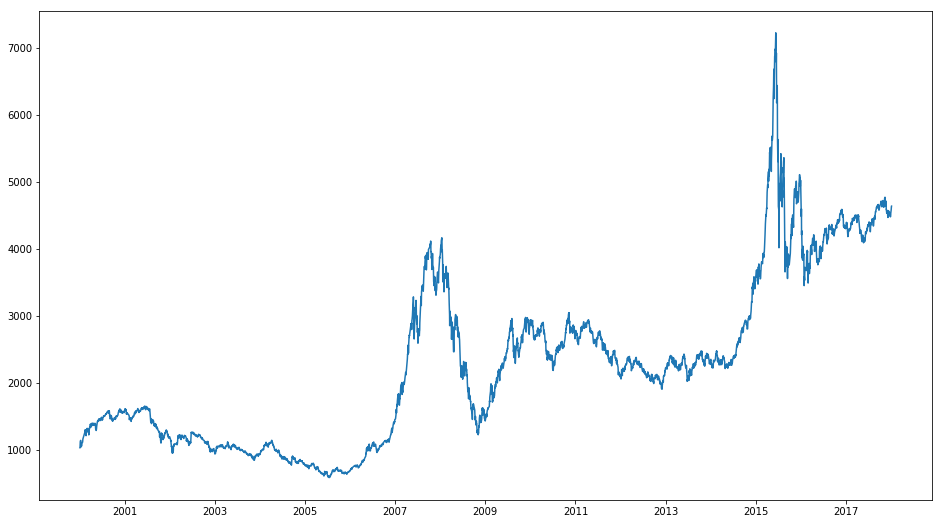

In [38]:
plt.figure(figsize=(16, 9))
plt.plot(df['881001.WI'])

In [44]:
asset = 'AU9999.SGE'
K = 732
mdd = df[asset].pct_change().rolling(window=K).apply(lambda x: empyrical.max_drawdown(x))
vol = df[asset].pct_change().rolling(window=K).apply(lambda x: empyrical.annual_volatility(x))

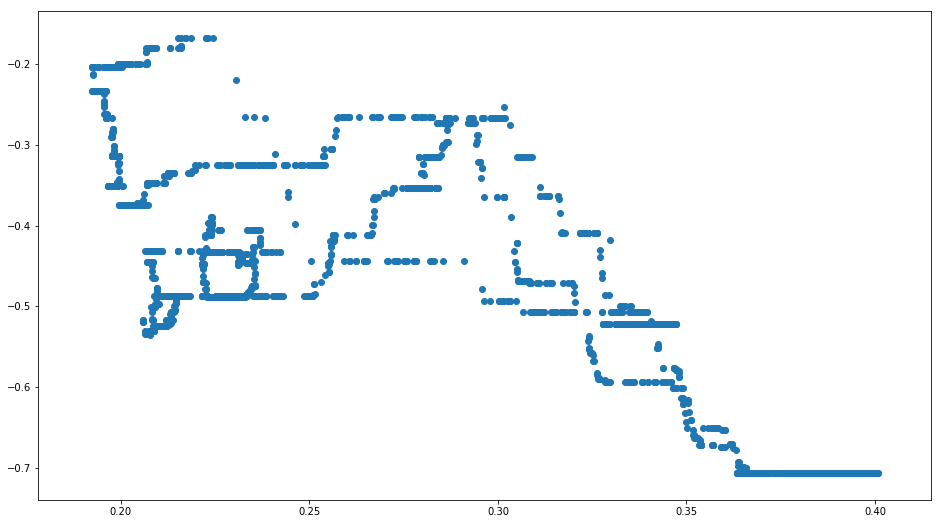

In [40]:
plt.figure(figsize=(16, 9))
plt.scatter(vol, mdd)

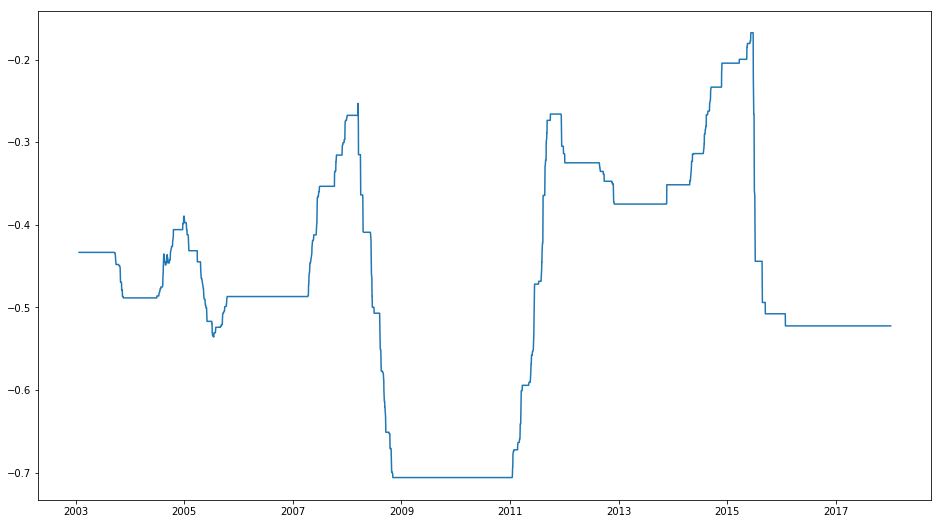

In [41]:
plt.figure(figsize=(16, 9))
plt.plot(mdd)

In [49]:
for asset in df.columns:
    K = 733
    mdd = df[df[asset] != 0][asset].pct_change().rolling(window=K).apply(lambda x: empyrical.max_drawdown(x))
    vol = df[df[asset] != 0][asset].pct_change().rolling(window=K).apply(lambda x: empyrical.annual_volatility(x))
    temp = pd.DataFrame({'price': df[df[asset] != 0][asset], 'max drawdown': mdd, 'annual volatility': vol})
    temp.to_excel('./data/%s.xlsx'%(asset))